In [90]:
import pandas as pd
data = pd.read_csv("componenteMineroEADCArasi.csv")
data.head()

,Componente ambiental,matriz,Nombre del punto,Este,Norte,Zona,Datum,Altitud,Tipo de muestra,Parámetros que incumplen la norma,Norma de comparación,Descripción de ubicación,Fecha,Aluminio total,Antinomio total,Arsénico total,Bario total,Berilio total,Bismuto total,Boro total,Cadmio total,Calcio total,Cerio total,Cianuro total,Cobalto total,Cobre total,Cromo total,Estaño total,Estroncio total,Fosforo total,Hierro total,Litio total,Magnesio total,Manganeso total,Mercurio total,Molibdeno total,Níquel total,Plata total,Plomo total,Potasio total,Selenio total,Sodio total,Talio total,Titanio total,Torio total,Uranio total,Vanadio total,Wolframio total,Zinc total
0,Suelo,Componente minero,B1-01,300189,8312656,19 Sur,WGS84,4683,Simple,-,-,Ubicados en el botadero N° 1,11/02/2017,14082,"0,186",11,208,"1,58","0,8321","0,191","0,0733",7057,"73,49",-,"13,1",42,30,"0,88",254,1960,27350,"4,28",4942,591,"0,07","1,46","21,1","0,223","15,9",1736,"4,55",247,"1,76","25,4","3,903","0,7319",52,"< 0,0017","82,7"
1,Suelo,Componente minero,B1-02,300086,8312652,19 Sur,WGS84,4619,Simple,-,-,Ubicados en el botadero N° 1,11/02/2017,18087,"0,4266",13,508,"1,31","3,559","< 0,180","0,0437",1736,"82,73","0,54","9,79",45,27,"1,1",145,1594,24379,"6,01",4631,381,"0,05","1,95","14,9","1,74","30,6",1548,"5,09",259,"1,38","12,3","5,621","0,9801",47,"< 0,0017","76,9"
2,Suelo,Componente minero,B1-03,299991,8312640,19 Sur,WGS84,4588,Simple,-,-,Ubicados en el botadero N° 1,11/02/2017,16963,"0,3837","8,1",429,"1,25","1,741","< 0,180","0,0549",2430,"60,46",-,"8,8",38,25,"1,8",165,1541,26499,"4,55",4107,345,"0,05","1,11","12,2","0,273","25,6",1482,"3,72",269,"0,8415","17,2","2,871","0,8083",46,"< 0,0017","60,5"
3,Suelo,Componente minero,B3-01,301456,8312155,19 Sur,WGS84,4578,Simple,-,-,Ubicados en el botadero N° 3,9/02/2017,12648,"1,142",135,405,"1,07","23,31","0,854","0,0449",536,"91,25",-,"9,68",54,32,"1,6",197,1662,30684,"2,91",1476,601,"0,08","1,84","9,48","0,235","58,2",1656,"5,09",104,"1,056","69,9","4,171","0,7192",57,"< 0,0017","55,1"
4,Suelo,Componente minero,B3-02,301418,8312108,19 Sur,WGS84,4573,Simple,-,-,Ubicados en el botadero N° 3,9/02/2017,10437,"3,643",155,1143,"0,839","12,74","0,919","0,0945",511,"23,53","0,5","13,6",79,13,"5,9",162,1101,25972,"8,42",515,1404,"0,29","3,25","11,6","0,621",102,1225,"6,78",86,"3,301",207,"2,692","0,7111",27,"0,0046","23,8"


In [92]:
data2 = data[(data["Uranio total"] < "1") & (data["Altitud"] < 4500)]
data2. head()

,Componente ambiental,matriz,Nombre del punto,Este,Norte,Zona,Datum,Altitud,Tipo de muestra,Parámetros que incumplen la norma,Norma de comparación,Descripción de ubicación,Fecha,Aluminio total,Antinomio total,Arsénico total,Bario total,Berilio total,Bismuto total,Boro total,Cadmio total,Calcio total,Cerio total,Cianuro total,Cobalto total,Cobre total,Cromo total,Estaño total,Estroncio total,Fosforo total,Hierro total,Litio total,Magnesio total,Manganeso total,Mercurio total,Molibdeno total,Níquel total,Plata total,Plomo total,Potasio total,Selenio total,Sodio total,Talio total,Titanio total,Torio total,Uranio total,Vanadio total,Wolframio total,Zinc total
13,Suelo,Componente minero,FB1-01,299909,8312632,19 Sur,WGS84,4477,Simple,-,-,Ubicados al Noroeste del botadero N° 1,11/02/2017,10464,"0,7254",32,156,"0,693","6,712","0,561","0,0602",9755,"61,32","0,52","5,15",27,19,"1,3",254,1236,22695,"3,65",3503,186,"0,17","1,53","11,4","0,325","24,6",1443,"4,1",426,"6,95","16,8","3,864","0,5547",36,"< 0,0017","46,9"
14,Suelo,Componente minero,FB1-02,299881,8312644,19 Sur,WGS84,4467,Simple,-,-,Ubicados al Noroeste del botadero N° 1,11/02/2017,9594,"0,5123",22,163,"0,719","3,545","< 0,180","0,0527",7205,"58,1",-,"4,93",25,22,"0,95",239,1155,19642,"3,28",3220,177,"0,19","1,6","10,3","0,199","20,2",1503,"3,54",392,"6,999","11,4","3,689","0,5995",36,"< 0,0017","54,4"


In [38]:
!pip install fiona
!pip install geopandas
from geopandas import GeoDataFrame
from shapely.geometry import Point
import fiona

     |████████████████████████████████| 17.9MB 5.1MB/s 
  Stored in directory: /root/.cache/pip/wheels/db/bf/bc/06a3e1bfe0ab27d2e720ceb3cff3159398d92644c0cec2c125
Successfully built munch
     |████████████████████████████████| 901kB 5.0MB/s 
     |████████████████████████████████| 11.2MB 15.5MB/s 


In [0]:
geometry = [Point(xy) for xy in zip(data2.Este, data2.Norte)]

In [0]:
crs = {"init":"epsg:32719"}

In [0]:
geo_df = GeoDataFrame(data2, geometry = geometry, crs=crs)

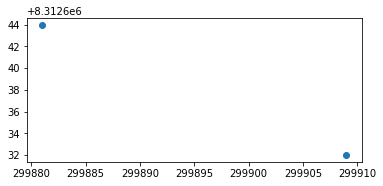

In [96]:
geo_df.plot()

In [0]:
geojson = geo_df.to_crs(epsg="4326").to_json()

In [98]:
import folium
mapa = folium.Map([-15.24,-70.85], zoom_start=12, tiles="Stamen Terrain") #condiciones del mapa
puntos = folium.features.GeoJson(geojson) #importamos los puntos(que estan en formato geojson)
mapa.add_children(puntos) #añadimos los puntos al mapa creado
mapa

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  after removing the cwd from sys.path.
